## S&P500 Replication by Cap and Sector

### Junho Kim

In [318]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
#Data Source: https://www.spglobal.com/spdji/en/indices/equity/sp-500/#overview
data = pd.read_excel("./S&P500_TR.xlsx",skiprows=6)
data = data.dropna()
data = data[(data['Effective date '] >= datetime.datetime(2023,1,1,0,0)) & (data['Effective date '] < datetime.datetime(2024,1,1,0,0))]
data = data.reset_index(drop=True)

In [123]:
data

,Effective date,S&P 500 (TR)
0,2023-01-03 00:00:00,8145.60
1,2023-01-04 00:00:00,8207.42
2,2023-01-05 00:00:00,8113.15
3,2023-01-06 00:00:00,8298.61
4,2023-01-09 00:00:00,8293.80
...,...,...
245,2023-12-22 00:00:00,10292.37
246,2023-12-26 00:00:00,10335.98
247,2023-12-27 00:00:00,10351.60
248,2023-12-28 00:00:00,10356.59


#### 1. Calculate the overal return of the entire index

- It considers reinvestment of cash dividends

In [127]:
overall_return = (data.iloc[-1,1] - data.iloc[0,1])/data.iloc[0,1]
print(f"overall return of entire S&P500 index is {overall_return*100:.2f}%")

overall return of entire S&P500 index is 26.79%


#### 2. Calculate return by market capitalization

- Collected S&P500 current constituents data from WRDS
- Collected addition and deletion data from S&P Index News to get deleted ticker
- Collected stock price data using the collected ticker from CRSP

Historical Market Capitalization for S&P Guidelines are below:    
From 01/04/2023, small: \\$750mn ~ \\$4.6bn, mid: \\$4.6bn ~ \\$12.7bn, Large: > \\$12.7bn     
From 07/05/2023, small: \\$850mn ~ \\$5.2bn, mid: \\$5.2bn ~ \\$14.5bn, Large: > \\$14.5bn 

In [250]:
stock = pd.read_excel("./Stock_2023.xlsx")

In [256]:
stock_backup = stock

In [258]:
stock_backup[stock_backup['Delisting Price']>0]

,PERMNO,Names Date,Standard Industrial Classification Code,Ticker Symbol,Company Name,Trading Status,Amount After Delisting,Delisting Code,Dividend Cash Amount,Delisting Price,Price or Bid/Ask Average,Volume,Returns,Shares Outstanding,Returns without Dividends,Return on the S&P 500 Index
3796,11786,2023-03-10,6020,SIVB,S V B FINANCIAL GROUP,A,0.000,584.0,NaN,0.400,-39.369999,0.0,-0.628725,59201.0,-0.628725,-0.014478
6378,12448,2023-04-28,6029,FRC,FIRST REPUBLIC BANK S F NEW,A,0.334,584.0,NaN,0.334,3.510000,176848332.0,-0.432956,176742.0,-0.432956,0.008253
18186,15486,2023-03-22,2834,SIOX,SIO GENE THERAPIES INC,A,0.402,584.0,NaN,0.402,0.415000,3349199.0,0.020910,73975.0,0.020910,-0.016463
118665,90090,2023-03-10,6022,SBNY,SIGNATURE BANK NEW YORK N Y,A,0.000,584.0,NaN,0.130,70.000000,21489252.0,-0.228735,62974.0,-0.228735,-0.014478


Data Processing
- Delisted stocks: SIVB, FRC, SIOX, SBNY
- These stocks don't have price data after delisted
- Some data points have negative price with zero volume
- To remove this data points, filter data by volume is larger than zero.

In [202]:
stock.columns

Index(['PERMNO', 'Names Date', 'Names Ending Date',
       'Standard Industrial Classification Code', 'Ticker Symbol',
       'Company Name', 'Trading Symbol', 'Trading Status', 'Security Status',
       'Standard Industrial Classification Code.1', 'Delisting Code',
       'Number of Shares Outstanding', 'Header SIC Major Gorup',
       'Header SIC Industry Group', 'Dividend Cash Amount',
       'Shares Observation End Date', 'Delisting Price',
       'Price or Bid/Ask Average', 'Volume', 'Returns', 'Shares Outstanding',
       'Open Price', 'NASDAQ Number of Trades', 'Returns without Dividends',
       'Return on the S&P 500 Index'],
      dtype='object')

In [260]:
stock = stock[['Names Date','Ticker Symbol','Company Name','Standard Industrial Classification Code','Price or Bid/Ask Average','Volume','Dividend Cash Amount','Returns','Returns without Dividends','Return on the S&P 500 Index','Shares Outstanding']]
stock.columns = ['Date','Ticker','Name','SIC','Price','Volume','Div','Returns','Return without Div','Returns on S&P500','Outstanding']

In [289]:
stock['Cap(millions)'] = stock.loc[:,'Price'] * stock.loc[:,'Outstanding']/ 1e6
stock = stock[stock['Volume'] > 0 ]

In [522]:
start_price = stock[stock['Date']=='2023-01-03'].sort_values('Cap(millions)')
end_price = stock[stock['Date']=='2023-12-29'].sort_values('Cap(millions)')

In [295]:
start_price

,Date,Ticker,Name,SIC,Price,Volume,Div,Returns,Return without Div,Returns on S&P500,Outstanding,Cap(millions)
18132,2023-01-03,SIOX,SIO GENE THERAPIES INC,2834,0.443500,379477.0,NaN,0.019540,0.019540,-0.004001,73975.0,0.032808
95619,2023-01-03,MLSS,MILESTONE SCIENTIFIC INC,3843,0.486000,45950.0,NaN,0.012500,0.012500,-0.004001,69795.0,0.033920
56919,2023-01-03,LEE,LEE ENTERPRISES INC,2711,18.950001,1873.0,NaN,0.021013,0.021013,-0.004001,6043.0,0.114515
98369,2023-01-03,CMT,CORE MOLDING TECHNOLOGIES INC,3089,13.100000,38615.0,NaN,0.008468,0.008468,-0.004001,8920.0,0.116852
73419,2023-01-03,ITI,ITERIS INC,3663,3.060000,46374.0,NaN,-0.016077,-0.016077,-0.004001,42346.0,0.129579
...,...,...,...,...,...,...,...,...,...,...,...,...
119668,2023-01-03,GOOGL,ALPHABET INC,7375,89.120003,28089144.0,NaN,0.010087,0.010087,-0.004001,5956000.0,530.798736
14632,2023-01-03,GOOG,ALPHABET INC,7375,89.699997,20710597.0,NaN,0.010932,0.010932,-0.004001,5968000.0,535.329582
99369,2023-01-03,AMZN,AMAZON COM INC,7370,85.820000,76643433.0,NaN,0.021667,0.021667,-0.004001,10242000.0,878.968437
250,2023-01-03,MSFT,MICROSOFT CORP,7370,239.580002,25723760.0,NaN,-0.001001,-0.001001,-0.004001,7447000.0,1784.152274


In [268]:
end_price['Cap(millions)']

57168        0.048338
95868        0.052174
98618        0.160377
73668        0.221738
41417        0.341240
             ...     
119917     824.031324
105618    1223.193403
99618     1556.169505
499       2794.827866
15381     2976.556715
Name: Cap(millions), Length: 519, dtype: float64

In [524]:
#Chekc the company which has different class of stock
start_price[start_price['Name'].duplicated()]

,Date,Ticker,Name,SIC,Price,Volume,Div,Returns,Return without Div,Returns on S&P500,Outstanding,Cap(millions)
12632,2023-01-03,NWSA,NEWS CORP NEW,9999,18.299999,1846029.0,NaN,0.005494,0.005494,-0.004001,382349.0,6.996986
24439,2023-01-03,FOXA,FOX CORP,9999,30.270000,2729413.0,NaN,-0.003293,-0.003293,-0.004001,297919.0,9.018008
57919,2023-01-03,MKC,MCCORMICK & CO INC,2099,83.470001,931040.0,NaN,0.006997,0.006997,-0.004001,250601.0,20.917666
59169,2023-01-03,LEN,LENNAR CORP,1531,91.980003,2351929.0,NaN,0.016354,0.016354,-0.004001,254767.0,23.433470
14632,2023-01-03,GOOG,ALPHABET INC,7375,89.699997,20710597.0,NaN,0.010932,0.010932,-0.004001,5968000.0,535.329582


In [348]:
#Company that has different class of stock in S&P index
constituents = pd.read_excel("./S&P500 Constituents.xlsx") #As of 2024-04-04
constituents.columns

Index(['Index Name (indexname)', 'Global Company Key (gvkey)',
       'Issue ID (iid)', 'Ticker (tic)', 'Company Name (companyname)',
       'Primary Security Flag (primaryflag)', 'Date Added to Index (fromdate)',
       'CIQ Company ID (companyid)', 'CIQ Constituent ID (constituentid)',
       'CIQ Index ID (indexid)', 'CIQ Security ID (securityid)',
       'CIQ Trading Item ID (tradingitemid)'],
      dtype='object')

In [350]:
constituents[constituents['Company Name (companyname)'].duplicated()]

,Index Name (indexname),Global Company Key (gvkey),Issue ID (iid),Ticker (tic),Company Name (companyname),Primary Security Flag (primaryflag),Date Added to Index (fromdate),CIQ Company ID (companyid),CIQ Constituent ID (constituentid),CIQ Index ID (indexid),CIQ Security ID (securityid),CIQ Trading Item ID (tradingitemid)
132,S&P 500,34636,2,FOX,Fox Corporation,0,2019-03-19,546623668,606772782,2668699,598861345,604619420
200,S&P 500,160329,3,GOOG,Alphabet Inc.,0,2015-10-05,29096,312693485,2668699,257504287,260152426
232,S&P 500,18043,1,NWSA,News Corporation,1,2013-07-01,212741644,242270951,2668699,238121727,241894833


In [352]:
start_by_name = start_by_name.reset_index(drop=True)
start_by_name = start_by_name[]

,Name,Cap(millions)
0,APPLE INC,1981.409839
1,MICROSOFT CORP,1784.152274
2,ALPHABET INC,1066.128318
3,AMAZON COM INC,878.968437
4,UNITEDHEALTH GROUP INC,484.590779
...,...,...
511,ITERIS INC,0.129579
512,CORE MOLDING TECHNOLOGIES INC,0.116852
513,LEE ENTERPRISES INC,0.114515
514,MILESTONE SCIENTIFIC INC,0.033920


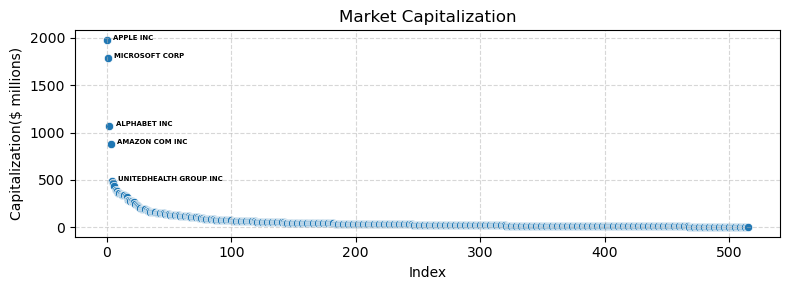

In [358]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=start_by_name, x=start_by_name.index, y="Cap(millions)")
for i in range(5):
    plt.text(
        start_by_name.index[i] + 5,  # 약간 오른쪽으로 밀어서
        start_by_name.loc[i, "Cap(millions)"], 
        start_by_name.loc[i, 'Name'],
        fontsize=5,
        weight='bold',
        color='black'
    )
plt.title("Market Capitalization")
plt.xlabel("Index")
plt.ylabel("Capitalization($ millions)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [398]:
#Statistics
start_by_name['Cap(millions)'].describe()

count     516.000000
mean       63.805631
std       146.548736
min         0.032808
25%        14.497362
50%        27.771193
75%        56.666857
max      1981.409839
Name: Cap(millions), dtype: float64

#### Market Capitalization Classification    

I classify U.S. equities into market cap segment based on cumulative market capitalization percentile break point as follows:

| Segment       | Cumulative Market Cap Range | Banding Range (Buffer)     |
|---------------|------------------------------|-----------------------------|
| Mega Cap      | 0% – 70%                     | 64% – 76%                   |
| Mid Cap       | 70% – 85%                    | 76% – 81%                   |
| Small Cap     | 85% – 100%                    | 81% – 89%, 96% – 99.5%      |

> *Note:* Breakpoints are determined using each security’s midpoint share of total market capitalization.


#### Reason to Use This Classification

1. Comprehensive Market Coverage    
  The classification ensures 100% market coverage with mutually exclusive segments.

2. Minimized Turnover  
  Buffer zones (banding) and partial assignments (packeting) reduce index rebalancing frequency and trading costs.

3. Investment Strategy Alignment  
  It supports consistent segmentation for large-cap, mid-cap, and small-cap investing, useful in style analysis and portfolio construction.

4. Scalability & Replicability  
  Enables index funds to track clearly defined market slices with minimal ambiguity.

In [441]:
# 1. Sort by market capitalization in descending order
start_by_name = start_price.groupby("Name",as_index=False)['Cap(millions)'].sum().sort_values('Cap(millions)',ascending=False)
end_by_name = end_price.groupby("Name",as_index=False)['Cap(millions)'].sum().sort_values('Cap(millions)',ascending=False)

In [443]:
# 2. Calculate total market capitalization
start_total_cap = start_by_name["Cap(millions)"].sum()
end_total_cap = end_by_name["Cap(millions)"].sum()

# 3. Compute cumulative market capitalization ratio (Cum %)
start_by_name["CumulativeCap"] = start_by_name["Cap(millions)"].cumsum()
start_by_name["Cum %"] = start_by_name["CumulativeCap"] / start_total_cap

end_by_name["CumulativeCap"] = end_by_name["Cap(millions)"].cumsum()
end_by_name["Cum %"] = end_by_name["CumulativeCap"] / end_total_cap


# 4. Classify according to CRSP definitions
def classify_market_cap(x):
    if x <= 0.70:
        return "Mega"
    elif x <= 0.85:
        return "Mid"
    else:
        return "Small"

start_by_name["CapCategory"] = start_by_name["Cum %"].apply(classify_market_cap)
end_by_name["CapCategory"] = end_by_name["Cum %"].apply(classify_market_cap)

# 5. Split into separate DataFrames by category
start_mega = start_by_name[start_by_name["CapCategory"] == "Mega"]
start_mid = start_by_name[start_by_name["CapCategory"] == "Mid"]
start_small = start_by_name[start_by_name["CapCategory"] == "Small"]

end_mega = end_by_name[end_by_name["CapCategory"] == "Mega"]
end_mid = end_by_name[end_by_name["CapCategory"] == "Mid"]
end_small = end_by_name[end_by_name["CapCategory"] == "Small"]

In [445]:
# 6. Calculate the return by market capitalization
mega = (end_mega['Cap(millions)'].sum() - start_mega['Cap(millions)'].sum())/start_mega['Cap(millions)'].sum()
mid = (end_mid['Cap(millions)'].sum() - start_mid['Cap(millions)'].sum())/start_mid['Cap(millions)'].sum()
small = (end_small['Cap(millions)'].sum() - start_small['Cap(millions)'].sum())/start_small['Cap(millions)'].sum()

print(f"Return for large capitalization stock in S&P500 is : {mega*100:.2f}%")
print(f"Return for mid capitalization stock in S&P500 is : {mid*100:.2f}%")
print(f"Return for small capitalization stock in S&P500 is : {small*100:.2f}%")

Return for large capitalization stock in S&P500 is : 24.13%
Return for mid capitalization stock in S&P500 is : 23.97%
Return for small capitalization stock in S&P500 is : 23.58%


#### 3. Caclulate return by sector

There are three types of industry classification:    

**Comparison: SIC vs GICS vs NAICS**

| Feature                     | SIC                              | NAICS                               | GICS                                      |
|----------------------------|-----------------------------------|--------------------------------------|-------------------------------------------|
| **Full Name**              | Standard Industrial Classification | North American Industry Classification System | Global Industry Classification Standard     |
| **Developed By**           | U.S. Government (1937)            | U.S., Canada, Mexico (1997)          | S&P and MSCI (1999)                        |
| **Governance**             | U.S. Federal Agencies             | U.S. Census Bureau (tri-national)    | S&P Dow Jones Indices & MSCI               |
| **Purpose**                | Regulatory, historical economics  | Economic statistics and regulation   | Investment research and asset management   |
| **Geographic Scope**       | United States                     | North America (U.S., Canada, Mexico) | Global                                      |
| **Update Frequency**       | Infrequent (last updated 1987)    | Regular (~5-year cycle)              | Frequent (annually reviewed, with revisions) |
| **Code Format**            | 4-digit numeric                   | 6-digit numeric                      | 4-level alphanumeric hierarchy             |
| **Hierarchy Levels**       | Limited (industry group level)    | Sector → Subsector → Industry        | Sector → Industry Group → Industry → Sub-industry |
| **Usage in Finance**       | Rare in modern finance            | Rare in finance; mostly in policy    | Standard for indices, ETFs, institutional portfolios |
| **Flexibility to Innovation** | Low                            | Medium                               | High                             GICS offers for modern investment analysis.

**Three reasons that I use GICS:**

1. Investment Relevance and Precision: It is designed for financial markets, enabling precise classification of companies based on business activities relevant to investors.

2. Global Consistency and Comparability: As a globally accepted standard co-developed by MSCI and S&P Dow Jones Indices, GICS provides a unified framework for comparing companies across countries and regions

3. Dynamic and Adaptable Structure: GICS is reviewed and updated regularly to reflect structural changes in the global economy

- Collected GICS data from Compustat

\- Data Processing

In [742]:
#Grouping by SIC code from 2022 to 2024
gics = pd.read_excel('./GICS code.xlsx')

In [743]:
gics['Sector Code'] = gics['GIC Sub-Industries'].astype(str).str[:2].astype(int)
gics

,Global Company Key - Segment Annual Fundamentals,Segment Type,Segment Identifier,Data Date - Segment Annual Fundamentals,Source Date - Segment Annual Fundamentals,Company Name,Ticker Symbol,GIC Sub-Industries,Sector Code
0,1045,BUSSEG,1,2022-12-31,2024-12-31,AMERICAN AIRLINES GROUP INC,AAL,20302010,20
1,1045,GEOSEG,2,2024-12-31,2024-12-31,AMERICAN AIRLINES GROUP INC,AAL,20302010,20
2,1045,BUSSEG,1,2022-12-31,2023-12-31,AMERICAN AIRLINES GROUP INC,AAL,20302010,20
3,1045,GEOSEG,8,2022-12-31,2022-12-31,AMERICAN AIRLINES GROUP INC,AAL,20302010,20
4,1045,GEOSEG,8,2022-12-31,2024-12-31,AMERICAN AIRLINES GROUP INC,AAL,20302010,20
...,...,...,...,...,...,...,...,...,...
20102,316056,OPSEG,3,2022-12-31,2023-12-31,ALLEGION PLC,ALLE,20102010,20
20103,316056,OPSEG,2,2023-12-31,2023-12-31,ALLEGION PLC,ALLE,20102010,20
20104,316056,GEOSEG,7,2022-12-31,2024-12-31,ALLEGION PLC,ALLE,20102010,20
20105,316056,OPSEG,4,2023-12-31,2024-12-31,ALLEGION PLC,ALLE,20102010,20


In [744]:
gics_sector_map = {
    10: 'Energy',
    15: 'Materials',
    20: 'Industrials',
    25: 'Consumer Discretionary',
    30: 'Consumer Staples',
    35: 'Health Care',
    40: 'Financials',
    45: 'Information Technology',
    50: 'Communication Services',
    55: 'Utilities',
    60: 'Real Estate'
}

gics['Sector'] = gics['Sector Code'].map(gics_sector_map)
gics


,Global Company Key - Segment Annual Fundamentals,Segment Type,Segment Identifier,Data Date - Segment Annual Fundamentals,Source Date - Segment Annual Fundamentals,Company Name,Ticker Symbol,GIC Sub-Industries,Sector Code,Sector
0,1045,BUSSEG,1,2022-12-31,2024-12-31,AMERICAN AIRLINES GROUP INC,AAL,20302010,20,Industrials
1,1045,GEOSEG,2,2024-12-31,2024-12-31,AMERICAN AIRLINES GROUP INC,AAL,20302010,20,Industrials
2,1045,BUSSEG,1,2022-12-31,2023-12-31,AMERICAN AIRLINES GROUP INC,AAL,20302010,20,Industrials
3,1045,GEOSEG,8,2022-12-31,2022-12-31,AMERICAN AIRLINES GROUP INC,AAL,20302010,20,Industrials
4,1045,GEOSEG,8,2022-12-31,2024-12-31,AMERICAN AIRLINES GROUP INC,AAL,20302010,20,Industrials
...,...,...,...,...,...,...,...,...,...,...
20102,316056,OPSEG,3,2022-12-31,2023-12-31,ALLEGION PLC,ALLE,20102010,20,Industrials
20103,316056,OPSEG,2,2023-12-31,2023-12-31,ALLEGION PLC,ALLE,20102010,20,Industrials
20104,316056,GEOSEG,7,2022-12-31,2024-12-31,ALLEGION PLC,ALLE,20102010,20,Industrials
20105,316056,OPSEG,4,2023-12-31,2024-12-31,ALLEGION PLC,ALLE,20102010,20,Industrials


In [748]:
gics_unique = gics[['Ticker Symbol','Company Name', 'Sector Code', 'Sector']].drop_duplicates()
gics_unique

,Ticker Symbol,Company Name,Sector Code,Sector
0,AAL,AMERICAN AIRLINES GROUP INC,20,Industrials
30,PNW,PINNACLE WEST CAPITAL CORP,55,Utilities
45,ABT,ABBOTT LABORATORIES,35,Health Care
129,AMD,ADVANCED MICRO DEVICES,45,Information Technology
201,APD,AIR PRODUCTS & CHEMICALS INC,15,Materials
...,...,...,...,...
19859,EPAM,EPAM SYSTEMS INC,45,Information Technology
19881,XYL,XYLEM INC,20,Industrials
19933,CBRE,CBRE GROUP INC,60,Real Estate
19975,LYB,LYONDELLBASELL INDUSTRIES NV,15,Materials


In [750]:
start_price[~start_price['Ticker'].isin(gics_unique['Ticker Symbol'])]

,Date,Ticker,Name,SIC,Price,Volume,Div,Returns,Return without Div,Returns on S&P500,Outstanding,Cap(millions)
18132,2023-01-03,SIOX,SIO GENE THERAPIES INC,2834,0.443500,379477.0,NaN,0.019540,0.019540,-0.004001,73975.0,0.032808
95619,2023-01-03,MLSS,MILESTONE SCIENTIFIC INC,3843,0.486000,45950.0,NaN,0.012500,0.012500,-0.004001,69795.0,0.033920
56919,2023-01-03,LEE,LEE ENTERPRISES INC,2711,18.950001,1873.0,NaN,0.021013,0.021013,-0.004001,6043.0,0.114515
98369,2023-01-03,CMT,CORE MOLDING TECHNOLOGIES INC,3089,13.100000,38615.0,NaN,0.008468,0.008468,-0.004001,8920.0,0.116852
73419,2023-01-03,ITI,ITERIS INC,3663,3.060000,46374.0,NaN,-0.016077,-0.016077,-0.004001,42346.0,0.129579
114869,2023-01-03,WW,W W INTERNATIONAL INC,7299,3.920000,1316821.0,NaN,0.015544,0.015544,-0.004001,70556.0,0.276580
41168,2023-01-03,BH,BIGLARI HOLDINGS INC,2099,138.350006,1785.0,NaN,-0.003242,-0.003242,-0.004001,2069.0,0.286246
30439,2023-01-03,METV,LISTED FUNDS TRUST,6726,7.160000,1761763.0,NaN,-0.002786,-0.002786,-0.004001,51375.0,0.367845
66669,2023-01-03,PAR,PAR TECHNOLOGY CORP,7372,26.540001,267736.0,NaN,0.018028,0.018028,-0.004001,27290.0,0.724277
1500,2023-01-03,CAL,CALERES INC,5661,21.870001,636788.0,NaN,-0.018402,-0.018402,-0.004001,35616.0,0.778922


In [752]:
gics_unique[~gics_unique['Ticker Symbol'].isin(start_price['Ticker'])]

,Ticker Symbol,Company Name,Sector Code,Sector
1313,BRK.B,BERKSHIRE HATHAWAY,40,Financials
1568,BF.B,BROWN FORMAN CORP,30,Consumer Staples
3113,RVTY,REVVITY INC,35,Health Care
4710,HUBB,HUBBELL INC,20,Industrials
10255,FI,FISERV INC,40,Financials
10522,FICO,FAIR ISAAC CORP,45,Information Technology
13283,JBL,JABIL INC,45,Information Technology
14244,COR,CENCORA INC,35,Health Care
14452,UBER,UBER TECHNOLOGIES INC,20,Industrials
14618,ABNB,AIRBNB INC,25,Consumer Discretionary


In [754]:
gics_unique[gics_unique['Ticker Symbol'].isin(start_price['Ticker'])]

,Ticker Symbol,Company Name,Sector Code,Sector
0,AAL,AMERICAN AIRLINES GROUP INC,20,Industrials
30,PNW,PINNACLE WEST CAPITAL CORP,55,Utilities
45,ABT,ABBOTT LABORATORIES,35,Health Care
129,AMD,ADVANCED MICRO DEVICES,45,Information Technology
201,APD,AIR PRODUCTS & CHEMICALS INC,15,Materials
...,...,...,...,...
19859,EPAM,EPAM SYSTEMS INC,45,Information Technology
19881,XYL,XYLEM INC,20,Industrials
19933,CBRE,CBRE GROUP INC,60,Real Estate
19975,LYB,LYONDELLBASELL INDUSTRIES NV,15,Materials


In [756]:
start_price['Ticker']

18132      SIOX
95619      MLSS
56919       LEE
98369       CMT
73419       ITI
          ...  
119668    GOOGL
14632      GOOG
99369      AMZN
250        MSFT
15132      AAPL
Name: Ticker, Length: 509, dtype: object

In [758]:
new_start_price = start_price.merge(
    gics_unique,
    how='left',
    left_on='Ticker',
    right_on='Ticker Symbol'
)

new_start_price = new_start_price.drop(columns=['Ticker Symbol','Company Name'])


new_end_price = end_price.merge(
    gics_unique,
    how='left',
    left_on='Ticker',
    right_on='Ticker Symbol'
)

new_end_price = new_end_price.drop(columns=['Ticker Symbol','Company Name'])

In [760]:
#Check the missing parts
new_start_price[new_start_price['Sector Code'].isna()]

,Date,Ticker,Name,SIC,Price,Volume,Div,Returns,Return without Div,Returns on S&P500,Outstanding,Cap(millions),Sector Code,Sector
0,2023-01-03,SIOX,SIO GENE THERAPIES INC,2834,0.443500,379477.0,NaN,0.019540,0.019540,-0.004001,73975.0,0.032808,NaN,NaN
1,2023-01-03,MLSS,MILESTONE SCIENTIFIC INC,3843,0.486000,45950.0,NaN,0.012500,0.012500,-0.004001,69795.0,0.033920,NaN,NaN
2,2023-01-03,LEE,LEE ENTERPRISES INC,2711,18.950001,1873.0,NaN,0.021013,0.021013,-0.004001,6043.0,0.114515,NaN,NaN
3,2023-01-03,CMT,CORE MOLDING TECHNOLOGIES INC,3089,13.100000,38615.0,NaN,0.008468,0.008468,-0.004001,8920.0,0.116852,NaN,NaN
4,2023-01-03,ITI,ITERIS INC,3663,3.060000,46374.0,NaN,-0.016077,-0.016077,-0.004001,42346.0,0.129579,NaN,NaN
5,2023-01-03,WW,W W INTERNATIONAL INC,7299,3.920000,1316821.0,NaN,0.015544,0.015544,-0.004001,70556.0,0.276580,NaN,NaN
6,2023-01-03,BH,BIGLARI HOLDINGS INC,2099,138.350006,1785.0,NaN,-0.003242,-0.003242,-0.004001,2069.0,0.286246,NaN,NaN
7,2023-01-03,METV,LISTED FUNDS TRUST,6726,7.160000,1761763.0,NaN,-0.002786,-0.002786,-0.004001,51375.0,0.367845,NaN,NaN
8,2023-01-03,PAR,PAR TECHNOLOGY CORP,7372,26.540001,267736.0,NaN,0.018028,0.018028,-0.004001,27290.0,0.724277,NaN,NaN
9,2023-01-03,CAL,CALERES INC,5661,21.870001,636788.0,NaN,-0.018402,-0.018402,-0.004001,35616.0,0.778922,NaN,NaN


In [762]:
idx = new_start_price[new_start_price['Sector Code'].isna()].index

new_start_price.loc[idx,'Sector Code'] = [
    35, 35, 25, 15, 45, 25, 25, 40, 45, 25,
    40, 10, 15, 40, 25, 15, 25, 20, 40, 40,
    40, 35, 40, 35, 10, 45, 50
]

new_start_price.loc[idx,'Sector'] = [
    "Health Care", "Health Care", "Consumer Discretionary", "Materials", "Information Technology",
    "Consumer Discretionary", "Consumer Discretionary", "Financials", "Information Technology", "Consumer Discretionary",
    "Financials", "Energy", "Materials", "Financials", "Consumer Discretionary", "Materials",
    "Consumer Discretionary", "Industrials", "Financials", "Financials",
    "Financials", "Health Care", "Financials", "Health Care", "Energy",
    "Information Technology", "Communication Services"
]

new_start_price

,Date,Ticker,Name,SIC,Price,Volume,Div,Returns,Return without Div,Returns on S&P500,Outstanding,Cap(millions),Sector Code,Sector
0,2023-01-03,SIOX,SIO GENE THERAPIES INC,2834,0.443500,379477.0,NaN,0.019540,0.019540,-0.004001,73975.0,0.032808,35.0,Health Care
1,2023-01-03,MLSS,MILESTONE SCIENTIFIC INC,3843,0.486000,45950.0,NaN,0.012500,0.012500,-0.004001,69795.0,0.033920,35.0,Health Care
2,2023-01-03,LEE,LEE ENTERPRISES INC,2711,18.950001,1873.0,NaN,0.021013,0.021013,-0.004001,6043.0,0.114515,25.0,Consumer Discretionary
3,2023-01-03,CMT,CORE MOLDING TECHNOLOGIES INC,3089,13.100000,38615.0,NaN,0.008468,0.008468,-0.004001,8920.0,0.116852,15.0,Materials
4,2023-01-03,ITI,ITERIS INC,3663,3.060000,46374.0,NaN,-0.016077,-0.016077,-0.004001,42346.0,0.129579,45.0,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,2023-01-03,GOOGL,ALPHABET INC,7375,89.120003,28089144.0,NaN,0.010087,0.010087,-0.004001,5956000.0,530.798736,50.0,Communication Services
505,2023-01-03,GOOG,ALPHABET INC,7375,89.699997,20710597.0,NaN,0.010932,0.010932,-0.004001,5968000.0,535.329582,50.0,Communication Services
506,2023-01-03,AMZN,AMAZON COM INC,7370,85.820000,76643433.0,NaN,0.021667,0.021667,-0.004001,10242000.0,878.968437,25.0,Consumer Discretionary
507,2023-01-03,MSFT,MICROSOFT CORP,7370,239.580002,25723760.0,NaN,-0.001001,-0.001001,-0.004001,7447000.0,1784.152274,45.0,Information Technology


In [764]:
#Check Missing Parts
new_end_price[new_end_price['Sector Code'].isna()]

,Date,Ticker,Name,SIC,Price,Volume,Div,Returns,Return without Div,Returns on S&P500,Outstanding,Cap(millions),Sector Code,Sector
0,2023-12-29,LEE,LEE ENTERPRISES INC,2711,7.870000,36543.0,NaN,-0.003797,-0.003797,-0.002826,6142.0,0.048338,NaN,NaN
1,2023-12-29,MLSS,MILESTONE SCIENTIFIC INC,3843,0.689900,266883.0,NaN,0.051677,0.051677,-0.002826,75625.0,0.052174,NaN,NaN
2,2023-12-29,CMT,CORE MOLDING TECHNOLOGIES INC,3089,18.530001,299054.0,NaN,-0.023709,-0.023709,-0.002826,8655.0,0.160377,NaN,NaN
3,2023-12-29,ITI,ITERIS INC,3663,5.200000,98378.0,NaN,-0.020716,-0.020716,-0.002826,42642.0,0.221738,NaN,NaN
4,2023-12-29,BH,BIGLARI HOLDINGS INC,5812,164.929993,2990.0,NaN,-0.012218,-0.012218,-0.002826,2069.0,0.341240,NaN,NaN
5,2023-12-29,METV,LISTED FUNDS TRUST,6726,11.510000,222922.0,NaN,-0.008613,-0.008613,-0.002826,40175.0,0.462414,NaN,NaN
6,2023-12-29,WW,W W INTERNATIONAL INC,7299,8.750000,3540687.0,NaN,-0.032080,-0.032080,-0.002826,79189.0,0.692904,NaN,NaN
7,2023-12-29,CAL,CALERES INC,5661,30.730000,327365.0,NaN,-0.029681,-0.029681,-0.002826,35502.0,1.090976,NaN,NaN
9,2023-12-29,PAR,PAR TECHNOLOGY CORP,7372,43.540001,400410.0,NaN,-0.006616,-0.006616,-0.002826,28021.0,1.220034,NaN,NaN
10,2023-12-29,WABC,WESTAMERICA BANCORPORATION,6020,56.410000,78980.0,NaN,-0.013984,-0.013984,-0.002826,26671.0,1.504511,NaN,NaN


In [766]:
new_end_price[new_end_price['Sector Code'].isna()]['Name']

0                LEE ENTERPRISES INC
1           MILESTONE SCIENTIFIC INC
2      CORE MOLDING TECHNOLOGIES INC
3                         ITERIS INC
4               BIGLARI HOLDINGS INC
5                 LISTED FUNDS TRUST
6              W W INTERNATIONAL INC
7                        CALERES INC
9                PAR TECHNOLOGY CORP
10        WESTAMERICA BANCORPORATION
11          EXPRO GROUP HOLDINGS N V
12               MR COOPER GROUP INC
13       ALPHA METALLURGICAL RES INC
15                     NEWS CORP NEW
17                         A T I INC
19                          FOX CORP
48                         I T T INC
172                SPDR SERIES TRUST
297                KINDER MORGAN INC
502                     ALPHABET INC
Name: Name, dtype: object

In [768]:
#Manually insert the values
idx = new_end_price[new_end_price['Sector Code'].isna()].index

new_end_price.loc[idx,'Sector Code'] = [
    25, 35, 15, 45, 25, 40, 25, 25, 45, 40,
    10, 40, 15, 50, 20, 50, 20, 40, 10, 50
]

new_end_price.loc[idx,'Sector'] = [
    "Consumer Discretionary", "Health Care", "Materials", "Information Technology", "Consumer Discretionary",
    "Financials", "Consumer Discretionary", "Consumer Discretionary", "Information Technology", "Financials",
    "Energy", "Financials", "Materials", "Communication Services", "Industrials", "Communication Services",
    "Industrials", "Financials", "Energy", "Communication Services"
]

new_end_price

,Date,Ticker,Name,SIC,Price,Volume,Div,Returns,Return without Div,Returns on S&P500,Outstanding,Cap(millions),Sector Code,Sector
0,2023-12-29,LEE,LEE ENTERPRISES INC,2711,7.870000,36543.0,NaN,-0.003797,-0.003797,-0.002826,6142.0,0.048338,25.0,Consumer Discretionary
1,2023-12-29,MLSS,MILESTONE SCIENTIFIC INC,3843,0.689900,266883.0,NaN,0.051677,0.051677,-0.002826,75625.0,0.052174,35.0,Health Care
2,2023-12-29,CMT,CORE MOLDING TECHNOLOGIES INC,3089,18.530001,299054.0,NaN,-0.023709,-0.023709,-0.002826,8655.0,0.160377,15.0,Materials
3,2023-12-29,ITI,ITERIS INC,3663,5.200000,98378.0,NaN,-0.020716,-0.020716,-0.002826,42642.0,0.221738,45.0,Information Technology
4,2023-12-29,BH,BIGLARI HOLDINGS INC,5812,164.929993,2990.0,NaN,-0.012218,-0.012218,-0.002826,2069.0,0.341240,25.0,Consumer Discretionary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2023-12-29,GOOGL,ALPHABET INC,7375,139.690002,18632534.0,NaN,-0.003851,-0.003851,-0.002826,5899000.0,824.031324,50.0,Communication Services
504,2023-12-29,NVDA,NVIDIA CORP,3670,495.220001,38725363.0,NaN,0.000000,0.000000,-0.002826,2470000.0,1223.193403,45.0,Information Technology
505,2023-12-29,AMZN,AMAZON COM INC,7370,151.940002,39634725.0,NaN,-0.009388,-0.009388,-0.002826,10242000.0,1556.169505,25.0,Consumer Discretionary
506,2023-12-29,MSFT,MICROSOFT CORP,7370,376.040009,18621428.0,NaN,0.002025,0.002025,-0.002826,7432262.0,2794.827866,45.0,Information Technology


In [770]:
deletion = [
    "VNO", "SIVB", "SBNY", "LUMN", "FRC", "DISH", "AAP",
    "LNC", "NWL", "DXC", "ATVI", "OGN", "SEE", "ALK", "SEDG"
]

addition = [
    "GEHC", "PODD", "BG", "FICO", "AXON", "PANW", "KVUE",
    "BX", "ABNB", "VLTO", "LULU", "HUBB", "UBER", "JBL", "BLDR"
]

In [772]:
stock[stock['Ticker'].isin(deletion)]

,Date,Ticker,Name,SIC,Price,Volume,Div,Returns,Return without Div,Returns on S&P500,Outstanding,Cap(millions)
3750,2023-01-03,SIVB,S V B FINANCIAL GROUP,6020,225.220001,753086.0,NaN,-0.021378,-0.021378,-0.004001,59172.0,13.326718
3751,2023-01-04,SIVB,S V B FINANCIAL GROUP,6020,240.059998,835611.0,NaN,0.065891,0.065891,0.007539,59172.0,14.204830
3752,2023-01-05,SIVB,S V B FINANCIAL GROUP,6020,232.589996,969710.0,NaN,-0.031117,-0.031117,-0.011646,59172.0,13.762815
3753,2023-01-06,SIVB,S V B FINANCIAL GROUP,6020,245.789993,1009536.0,NaN,0.056752,0.056752,0.022841,59172.0,14.543885
3754,2023-01-09,SIVB,S V B FINANCIAL GROUP,6020,249.429993,1078363.0,NaN,0.014809,0.014809,-0.000768,59172.0,14.759272
...,...,...,...,...,...,...,...,...,...,...,...,...
118661,2023-03-06,SBNY,SIGNATURE BANK NEW YORK N Y,6022,110.889999,1576992.0,NaN,-0.024714,-0.024714,0.000687,62974.0,6.983187
118662,2023-03-07,SBNY,SIGNATURE BANK NEW YORK N Y,6022,104.889999,1638760.0,NaN,-0.054108,-0.054108,-0.015327,62974.0,6.605343
118663,2023-03-08,SBNY,SIGNATURE BANK NEW YORK N Y,6022,103.349998,2172119.0,NaN,-0.014682,-0.014682,0.001415,62974.0,6.508363
118664,2023-03-09,SBNY,SIGNATURE BANK NEW YORK N Y,6022,90.760002,8458017.0,NaN,-0.121819,-0.121819,-0.018459,62974.0,5.715520


In [774]:
#Change the constituents of the index
start_price = start_price[~start_price['Ticker'].isin(addition)]
end_price = end_price[~end_price['Ticker'].isin(deletion)]

new_start_price = new_start_price.reset_index(drop=True)
new_end_price = new_end_price.reset_index(drop=True)

In [776]:
new_start_group = new_start_price.groupby("Sector",as_index=False)['Cap(millions)'].sum()
new_end_group = new_end_price.groupby("Sector",as_index=False)['Cap(millions)'].sum()

In [778]:
new_start_group

,Sector,Cap(millions)
0,Communication Services,2543.608838
1,Consumer Discretionary,3170.963144
2,Consumer Staples,2755.022449
3,Energy,1668.131339
4,Financials,4118.262993
5,Health Care,5173.118561
6,Industrials,3044.960002
7,Information Technology,7307.096127
8,Materials,892.969806
9,Real Estate,905.361690


In [780]:
new_end_group

,Sector,Cap(millions)
0,Communication Services,3675.175732
1,Consumer Discretionary,4652.441805
2,Consumer Staples,2760.522125
3,Energy,1599.221192
4,Financials,4649.935777
5,Health Care,5177.616250
6,Industrials,3659.730778
7,Information Technology,11685.402011
8,Materials,978.277864
9,Real Estate,1011.026746


In [907]:
change_list = pd.read_excel('./S&P500 Constituents.xlsx',sheet_name = 'Change',skiprows = 1)
change_list['Sector Code'] = change_list['Sector Code'].astype(float)
change_list

,Date,action,Ticker,Company Name,Sector Code,Sector,Unnamed: 6
0,2023-01-04,add,GEHC,GE HealthCare Technologies,35.0,Health Care,NaN
1,2025-01-05,delete,VNO,Vornado Realty Trust,60.0,Real Estate,NaN
2,2023-03-15,add,PODD,Insulet,35.0,Health Care,NaN
3,2023-03-15,delete,SIVB,SVB Financial Group,40.0,Financials,delisted
4,2023-03-15,add,BG,Bunge,30.0,Consumer Staples,NaN
5,2023-03-15,delete,SBNY,Signature Bank,40.0,Financials,delisted
6,2023-03-20,add,FICO,Fair Isaac & Co,45.0,Information Technology,NaN
7,2023-03-20,delete,LUMN,Lumen Technologies,50.0,Communication Services,NaN
8,2023-05-04,add,AXON,Axon Enterprise,20.0,Industrials,NaN
9,2023-05-04,delete,FRC,First Republic Bank,40.0,Financials,delisted


In [784]:
stock.head()

,Date,Ticker,Name,SIC,Price,Volume,Div,Returns,Return without Div,Returns on S&P500,Outstanding,Cap(millions)
0,2023-01-03,ORCL,ORACLE CORP,7372,83.720001,8997534.0,NaN,0.024223,0.024223,-0.004001,2696253.0,225.730304
1,2023-01-04,ORCL,ORACLE CORP,7372,84.480003,7836238.0,NaN,0.009078,0.009078,0.007539,2696253.0,227.779462
2,2023-01-05,ORCL,ORACLE CORP,7372,84.309998,7643784.0,NaN,-0.002012,-0.002012,-0.011646,2696253.0,227.321084
3,2023-01-06,ORCL,ORACLE CORP,7372,85.660004,8641597.0,NaN,0.016012,0.016012,0.022841,2696253.0,230.961042
4,2023-01-09,ORCL,ORACLE CORP,7372,86.419998,7519836.0,0.32,0.012608,0.008872,-0.000768,2696253.0,233.010179


In [828]:
start_sector = new_start_price[['Name', 'Sector Code', 'Sector']].drop_duplicates()
end_sector = new_end_price[['Name', 'Sector Code', 'Sector']].drop_duplicates()

stock_merged = stock.merge(start_sector, on='Name', how='left', suffixes=('', '_from_start'))
stock_merged

,Date,Ticker,Name,SIC,Price,Volume,Div,Returns,Return without Div,Returns on S&P500,Outstanding,Cap(millions),Sector Code,Sector
0,2023-01-03,ORCL,ORACLE CORP,7372,83.720001,8997534.0,NaN,0.024223,0.024223,-0.004001,2696253.0,225.730304,45.0,Information Technology
1,2023-01-04,ORCL,ORACLE CORP,7372,84.480003,7836238.0,NaN,0.009078,0.009078,0.007539,2696253.0,227.779462,45.0,Information Technology
2,2023-01-05,ORCL,ORACLE CORP,7372,84.309998,7643784.0,NaN,-0.002012,-0.002012,-0.011646,2696253.0,227.321084,45.0,Information Technology
3,2023-01-06,ORCL,ORACLE CORP,7372,85.660004,8641597.0,NaN,0.016012,0.016012,0.022841,2696253.0,230.961042,45.0,Information Technology
4,2023-01-09,ORCL,ORACLE CORP,7372,86.419998,7519836.0,0.32,0.012608,0.008872,-0.000768,2696253.0,233.010179,45.0,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130955,2023-12-22,TSLA,TESLA INC,9999,252.539993,93148541.0,NaN,-0.007701,-0.007701,0.001660,3178921.0,802.804688,25.0,Consumer Discretionary
130956,2023-12-26,TSLA,TESLA INC,9999,256.609985,86700724.0,NaN,0.016116,0.016116,0.004232,3178921.0,815.742871,25.0,Consumer Discretionary
130957,2023-12-27,TSLA,TESLA INC,9999,261.440002,106250779.0,NaN,0.018822,0.018822,0.001430,3178921.0,831.097114,25.0,Consumer Discretionary
130958,2023-12-28,TSLA,TESLA INC,9999,253.179993,113250680.0,NaN,-0.031594,-0.031594,0.000370,3178921.0,804.839195,25.0,Consumer Discretionary


In [858]:
idx = stock_merged[stock_merged['Sector Code'].isna()].index
new_change_list = change_list[['Ticker', 'Sector Code', 'Sector']].drop_duplicates()
stock_merged.loc[idx,:] = stock_merged.loc[idx,:].merge(new_change_list, on='Ticker', how='left')

idx_ci = stock_merged[stock_merged['Ticker']=='CI'].index
idx_jbl = stock_merged[stock_merged['Ticker']=='JBL'].index
stock_merged.loc[idx_ci,"Sector Code"] = 35
stock_merged.loc[idx_ci,"Sector"] = "Health Care"
stock_merged.loc[idx_jbl,"Sector Code"] = 45
stock_merged.loc[idx_jbl,"Sector"] = "Information Technology"


In [856]:
miss = stock_merged[stock_merged['Sector Code'].isna()]
miss = miss[~miss['Date'].isna()]
miss

,Date,Ticker,Name,SIC,Price,Volume,Div,Returns,Return without Div,Returns on S&P500,Outstanding,Cap(millions),Sector Code,Sector


In [903]:
stock_merged = stock_merged[~stock_merged['Date'].isna()]
stock_merged = stock_merged.reset_index(drop=True)
stock_merged

,Date,Ticker,Name,SIC,Price,Volume,Div,Returns,Return without Div,Returns on S&P500,Outstanding,Cap(millions),Sector Code,Sector
0,2023-01-03,ORCL,ORACLE CORP,7372.0,83.720001,8997534.0,NaN,0.024223,0.024223,-0.004001,2696253.0,225.730304,45.0,Information Technology
1,2023-01-04,ORCL,ORACLE CORP,7372.0,84.480003,7836238.0,NaN,0.009078,0.009078,0.007539,2696253.0,227.779462,45.0,Information Technology
2,2023-01-05,ORCL,ORACLE CORP,7372.0,84.309998,7643784.0,NaN,-0.002012,-0.002012,-0.011646,2696253.0,227.321084,45.0,Information Technology
3,2023-01-06,ORCL,ORACLE CORP,7372.0,85.660004,8641597.0,NaN,0.016012,0.016012,0.022841,2696253.0,230.961042,45.0,Information Technology
4,2023-01-09,ORCL,ORACLE CORP,7372.0,86.419998,7519836.0,0.32,0.012608,0.008872,-0.000768,2696253.0,233.010179,45.0,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126397,2023-12-22,TSLA,TESLA INC,9999.0,252.539993,93148541.0,NaN,-0.007701,-0.007701,0.001660,3178921.0,802.804688,25.0,Consumer Discretionary
126398,2023-12-26,TSLA,TESLA INC,9999.0,256.609985,86700724.0,NaN,0.016116,0.016116,0.004232,3178921.0,815.742871,25.0,Consumer Discretionary
126399,2023-12-27,TSLA,TESLA INC,9999.0,261.440002,106250779.0,NaN,0.018822,0.018822,0.001430,3178921.0,831.097114,25.0,Consumer Discretionary
126400,2023-12-28,TSLA,TESLA INC,9999.0,253.179993,113250680.0,NaN,-0.031594,-0.031594,0.000370,3178921.0,804.839195,25.0,Consumer Discretionary


**Return by Sector**

In [943]:
r2 = stock_merged[stock_merged['Date']=='2023-12-29'].groupby('Sector')['Cap(millions)'].sum()
r1 = stock_merged[stock_merged['Date']=='2023-01-03'].groupby('Sector')['Cap(millions)'].sum()
result = (r2 - r1) / r1 * 100
result = pd.DataFrame(result)
result = result.reset_index()
result

,Sector,Cap(millions)
0,Communication Services,44.041858
1,Consumer Discretionary,43.271959
2,Consumer Staples,-2.524382
3,Energy,-4.130978
4,Financials,8.453891
5,Health Care,-3.567072
6,Industrials,9.163735
7,Information Technology,59.253050
8,Materials,-11.395816
9,Real Estate,12.264894


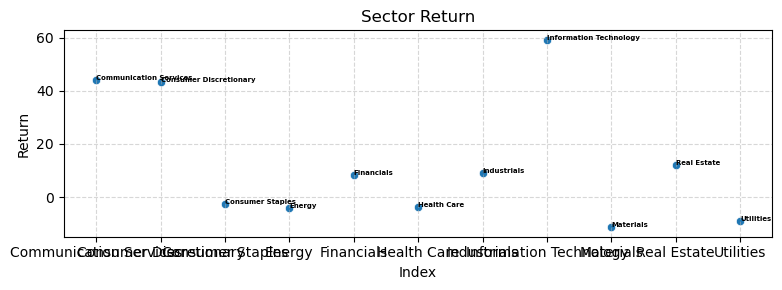

In [951]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=result, x='Sector', y="Cap(millions)")
for i in range(11):
    plt.text(
        result.index[i],  # 약간 오른쪽으로 밀어서
        result.loc[i, "Cap(millions)"], 
        result.loc[i, 'Sector'],
        fontsize=5,
        weight='bold',
        color='black'
    )
plt.title("Sector Return")
plt.xlabel("Index")
plt.ylabel("Return")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

For more accurate result, it needs to use Chain-Linked Sector Return Method

To accurately measure sector-level performance, we compute chain-linked sector returns that account for index constituent changes (additions and deletions) due to rebalancing events.    

Simple average or cap-weighted returns can be distorted by changes in the number and composition of stocks within a sector. To avoid this, we apply a time-weighted approach that:

\- Fixes the portfolio at each rebalancing period.

\- Calculates sector returns only from the constituents existing at the beginning of each period.

\- Links returns across periods using a geometric chaining process.


